<h1>Lab2</h1>

<h2><b>Negative image</b></h2>

<h3>Load opencv and plot modules</h3>

In [234]:
import cv2
import matplotlib.pyplot as plt

<h3>Read sample image</h3>

In [235]:
in_img = cv2.imread("./examples/lane_detection_1.jpg")

<h3>Plot input sample image</h3>

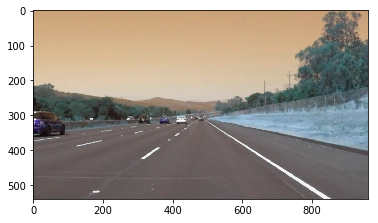

In [236]:
plt.imshow(in_img); plt.show();

<h3>Getting image parametrs</h3>


In [237]:
height = in_img.shape[0] 
width = in_img.shape[1]


<h3>Creating copy image for negative</h3>

In [238]:
neg_img = in_img.copy()

<h3><i>Fist approach: </i>loop with variable parameters<h3>

In [239]:
for row in range(height):
    for col in range(width):
        red = 255 - in_img[row][col][0]
        green = 255 - in_img[row][col][1]
        blue = 255 - in_img[row][col][2]
        neg_img[row][col]=[red,green,blue]

<h3>Plot negative sample image</h3>

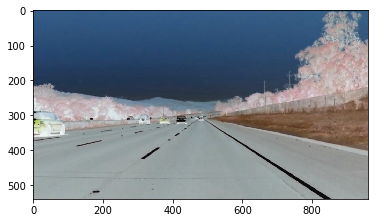

In [240]:
plt.imshow(neg_img); plt.show();

<h3><i>Second approach: </i>whole image processing<h3>

In [241]:
neg_img1 = 255 - in_img

<h3>Plot negative sample image</h3>

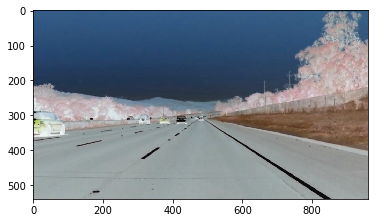

In [242]:
plt.imshow(neg_img1); plt.show();

<h2><b>Contrast enhancement</b></h2>

<h3>Load PIL and pylab modules</h3>

In [243]:
from PIL import Image, ImageEnhance
from pylab import array, plot, show, axis, arange, figure, uint8

<h3><i>First approach: </i>whole image processing with PIL module<h3>

<h3>Read sample image</h3>

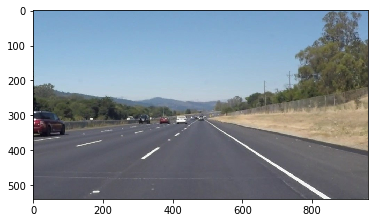

In [244]:
im = Image.open("./examples/lane_detection_1.jpg")
plt.imshow(im); plt.show();

<h3>Contrast enhancement</h3>

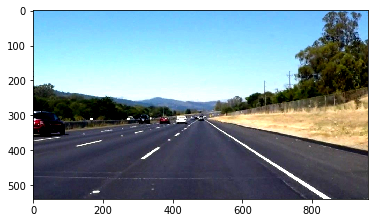

In [245]:
enhancer = ImageEnhance.Contrast(im)
enhanced_im = enhancer.enhance(2.0)
plt.imshow(enhanced_im); plt.show();

<h3><i>Second approach: </i>variable parametrs<h3>

<h3>Setting parametrs</h3>

In [246]:
maxIntensity = 255.0 
x = arange(maxIntensity)
phi = 2
theta = 4

<h3>Contrast enhancement</h3>

In [247]:
contr_im = (maxIntensity/phi)*(in_img/(maxIntensity/theta))**0.5
contr_im = array(newImage0,dtype=uint8)

<h3>Plot contrast enhancement sample image</h3>

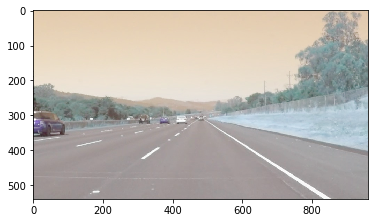

In [248]:
plt.imshow(contr_im); plt.show();

<h2><b>Gamma transformation</b></h2>

<h3>Setting parametrs</h3>

<h3>Load numpy module</h3>

In [249]:
import numpy as np

<h3>Read sample image</h3>

In [250]:
in_img_grayscale = cv2.imread("./examples/lane_detection_1.jpg", 0)

<h4>First Gamma correction</h4>

In [251]:
gamma = 2
img2 = np.power(in_img_grayscale, gamma)

<h4>Second Gamma correction</h4>

In [252]:
gamma = 3
img3 = np.power(in_img_grayscale, gamma)

<h4>Third Gamma correction</h4>

In [253]:
gamma = 4
img4 = np.power(in_img_grayscale, gamma)

<h3>Plot gamma corrected sample image</h3>

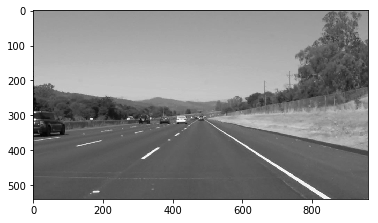

In [254]:
plt.imshow(in_img_grayscale, cmap='gray'); plt.show();

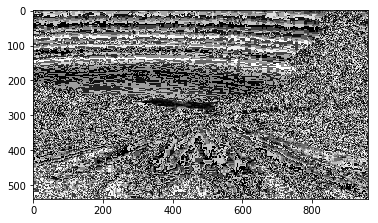

In [255]:
plt.imshow(img2, cmap='gray'); plt.show();

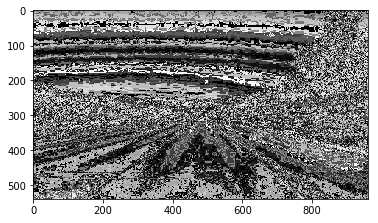

In [256]:
plt.imshow(img3, cmap='gray'); plt.show();

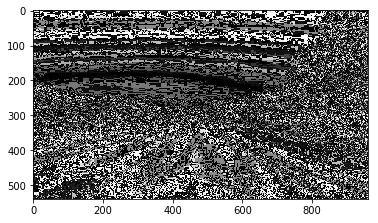

In [257]:
plt.imshow(img4, cmap='gray'); plt.show();

<h2>Histogram Equalization</h2>

<h3>Getting histogram</h3>

In [258]:
hist,bins = np.histogram(in_img_grayscale.flatten(),256,[0,256])

<h3>Plot histogram</h3>

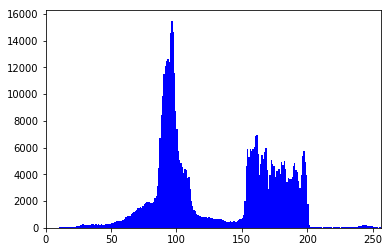

In [259]:
plt.hist(in_img_grayscale.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.show()

<h3>Histogram Equalization</h3>

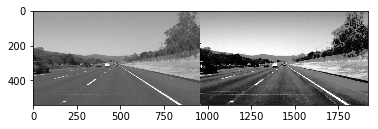

In [260]:
equ = cv2.equalizeHist(in_img_grayscale)
res = np.hstack((in_img_grayscale,equ)) 
plt.imshow(res, cmap='gray'); plt.show();